## Problem statement

We are Estimating the data about airline tickets sales plotting for next 2years

#### import packages

In [1]:

# Scoring functions
# Fit models

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet
from fbprophet import Prophet

# Scoring functions
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
data_input_file = 'international-airline-passengers.csv'
data = pd.read_csv(data_input_file)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
# to view the tail how much records have
data.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [4]:
# here the data have NaN values am dropping here
data.drop(144,axis=0,inplace=True)
data.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


<AxesSubplot:>

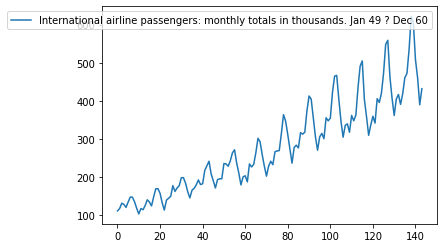

In [5]:
# here am plotting the data the sales going 
data.plot()

In [6]:
# here the names of the columns is difficult am changing in my way to understand
# ds = Month 
# y = International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
data.columns=['ds','y']
data.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
# here am converting the date time to months and year
data['ds']=pd.to_datetime(data['ds'])
data.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [8]:
# am using FBPrompt
# to view the what are the charecters
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [9]:
# initialize the model
model=Prophet()

In [10]:
# here am fitting the model 
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# to view the components
model.plot_components

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x0000000014299108>>

In [12]:
# create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [13]:
prediction=model.predict(future_dates)

In [14]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,55.627152,116.099585,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,47.636372,106.400553,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,79.999325,139.100806,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,76.971349,137.470999,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,81.021941,140.633220,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


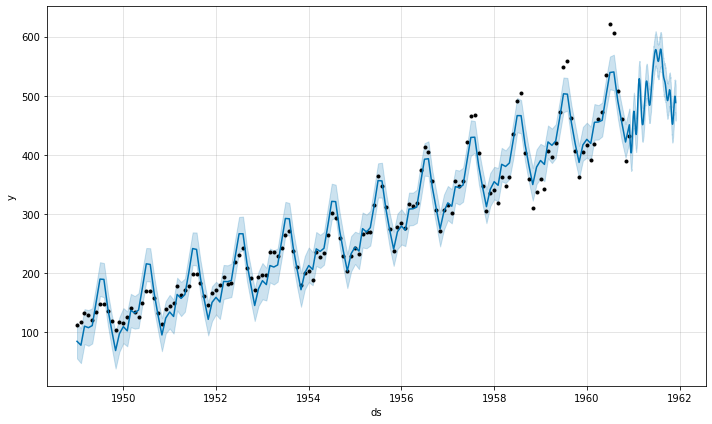

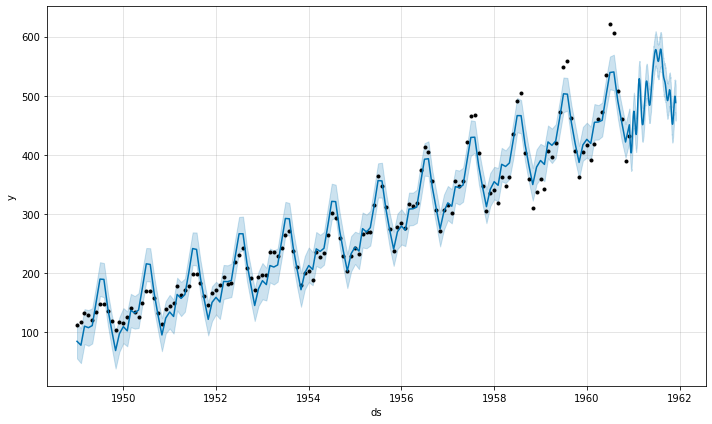

In [15]:
# plot the predicted  projection 
model.plot(prediction)

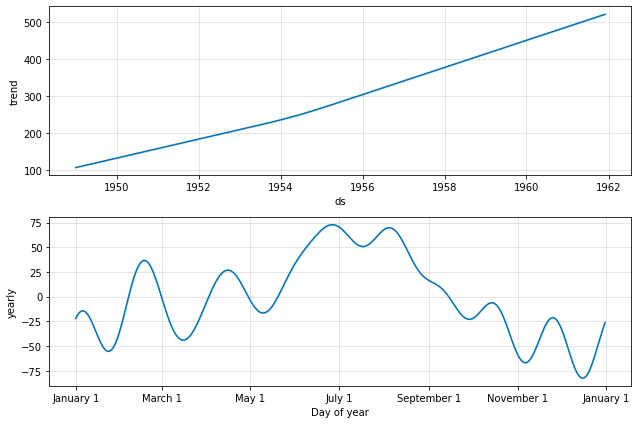

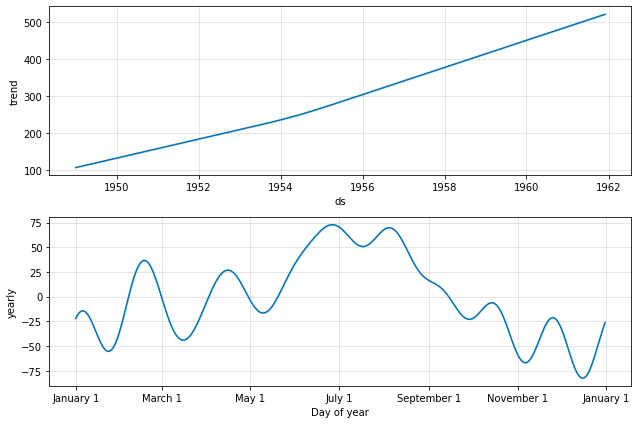

In [16]:
# visualize each  components [Trends , weekly]
model.plot_components(prediction)

In [17]:
# here am doing cross validation for last 2years
df_cv = cross_validation(model,initial="730 days", period="180 days", horizon="365 days")
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.137830,158.791889,150.0,1951-01-18
1,1951-03-01,171.498221,170.399671,172.594196,178.0,1951-01-18
2,1951-04-01,159.630469,157.497415,161.839073,163.0,1951-01-18
3,1951-05-01,144.280404,140.725135,147.809942,172.0,1951-01-18
4,1951-06-01,178.395560,173.592770,183.621931,178.0,1951-01-18


In [18]:
# to view the days in multiple factors
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


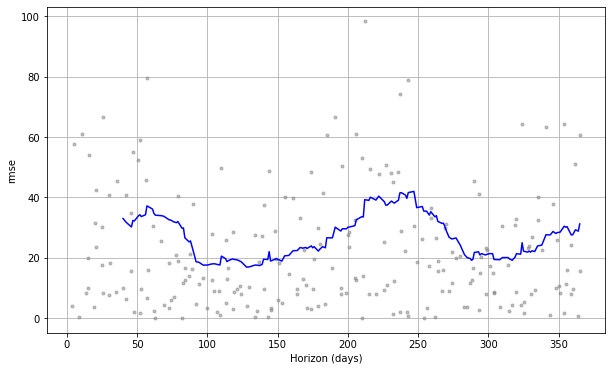

In [19]:
# here am plotting particular the "rmse" because the values are in manner
fig= plot_cross_validation_metric(df_cv,metric='rmse')